<a href="https://colab.research.google.com/github/Shreyansh0429/Group-8_/blob/main/Data_Cleaning_and__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [3]:
df = pd.read_csv('Final_Dataset.csv')


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727119 entries, 0 to 727118
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          727119 non-null  object
 1   IsHatespeech  727119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


In [10]:
df = df.drop_duplicates()

Removing all the duplicate data from the dataframe


In [11]:
df = df.dropna()

Removing all the null value rows.

In [13]:
df['Text'] = df['Text'].str.lower()

Converting all the data from the text column into the string format

In [14]:
def remove_special_characters(text):
    pattern = r"[^\w\s]"
    return re.sub(pattern, "", text)

df['Text'] = df['Text'].apply(remove_special_characters)

Removing any special characters and punctuation.

,Text,IsHatespeech
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
727114,i remember that they sent in the national defe...,0
727115,stats dont represent the problem race baiting ...,1
727116,the quote from the mother wow that hit hard ve...,0
727117,this video is so racist,0


# EDA

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the text column
vectorizer.fit(df['Text'])

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Print the vocabulary
print("Vocabulary:")
print(vocabulary)


Vocabulary:
['00' '000' '005' ...
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


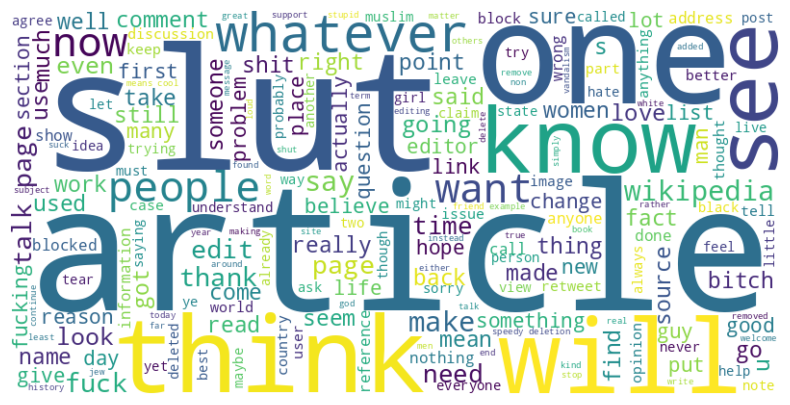

In [18]:
from wordcloud import WordCloud
text = " ".join(review for review in df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()